# California Housing Prediction


## Step 0 - Imports and Reading Data


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt # plots
import seaborn as sns # plots 
plt.style.use('ggplot')
# pd.set_option('max_columns', 200)

In [11]:
df = pd.read_csv("../data/housing.csv")

## Step 1: Data Understanding
- shape
- head/tail
- dtypes
- describe

In [ ]:
# show dimensionality of data (rows, cols)
df.shape

(20640, 10)

In [ ]:
# first five entries, see what data looks like
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# if df has lots of columns, and show them all
# df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [21]:
# show the data types of all cols
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [23]:
# some statistical info about our data, can come in useful for any stat calcs
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Step 2: Data Prep
- drop irrelevant cols
- find duplicate cols
- rename cols
- feature creation

In [ ]:
# show all the columns and decide what's important/not

df.columns

# no dropping any cols, bc they are all relevant to predictig median_house_value
# column drop example
# df.drop(['median_income'], axis=1)
# OR we can rewrite the df with the list of accepted columns
# EX: df = df[[longitude', 'latitude', 'housing_median_age', 'total_rooms',
#       'total_bedrooms', 'population', 'households',
#      'median_house_value', 'ocean_proximity']].copy()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# Column renaming
# no spaces, consistent capitalization
df.columns
# ex
# df.rename(columns={'total_rooms':'rooms_in_block'})


Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [31]:
# get amt of missing vals
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [35]:
# check duplicates
df.loc[df.duplicated(subset=['longitude'])]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
# why?
df.query('longitude == -122.25')

# this just represents the location of different houses in a block from my understanding

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
18899,-122.25,38.11,52.0,2846.0,705.0,1519.0,620.0,2.1976,97900.0,NEAR BAY
18913,-122.25,38.15,24.0,2917.0,543.0,1878.0,531.0,3.7014,123600.0,NEAR BAY
19751,-122.25,40.17,47.0,1554.0,308.0,846.0,301.0,1.8077,54100.0,INLAND
19756,-122.25,40.17,19.0,3182.0,630.0,1741.0,642.0,1.9727,64900.0,INLAND


# Step 3: Feature Understanding

(Univariate analysis)
- Plotting feature distributions
    - Histogram
    - KDE
    - Boxplot

Text(0.5, 0, 'Median House Value (USD)')

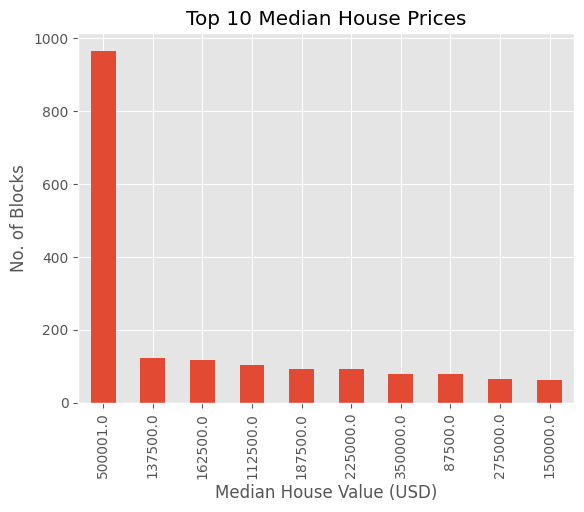

In [48]:
ax = df['median_house_value'].value_counts() \
    .head(10) \
    .plot(kind='bar', title='Top 10 Median House Prices')

ax.set_ylabel("No. of Blocks")
ax.set_xlabel("Median House Value (USD)")


Text(0.5, 0, 'Price (USD)')

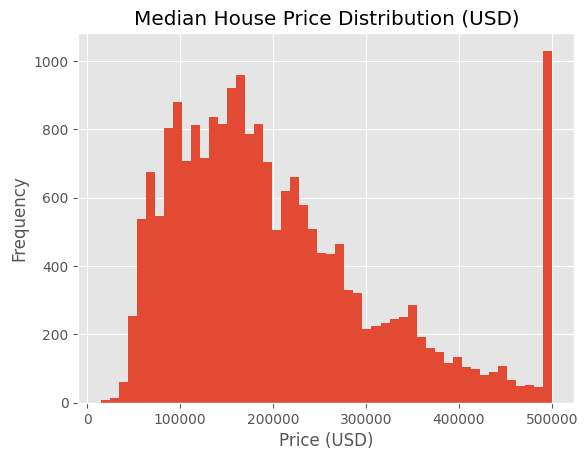

In [61]:
ax = df['median_house_value'].plot(kind='hist', bins=50, title='Median House Price Distribution (USD)')
ax.set_xlabel("Price (USD)")

#### looks like the census for 1990 had a max of 500000, which explains why there's such a skewed amount for 500k

Text(0.5, 0, 'Price (USD)')

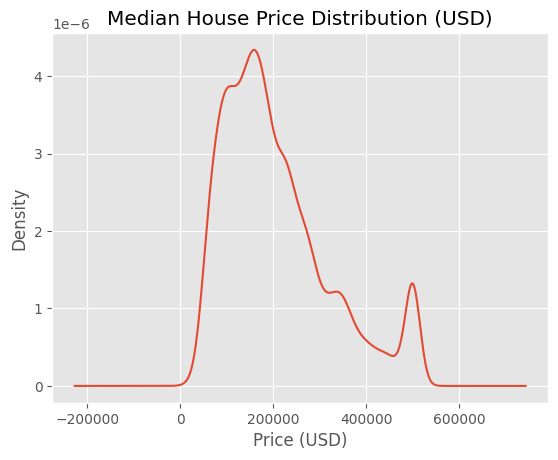

In [64]:
ax = df['median_house_value'].plot(kind='kde', title='Median House Price Distribution (USD)')
ax.set_xlabel("Price (USD)")

Text(0, 0.5, 'Price (USD)')

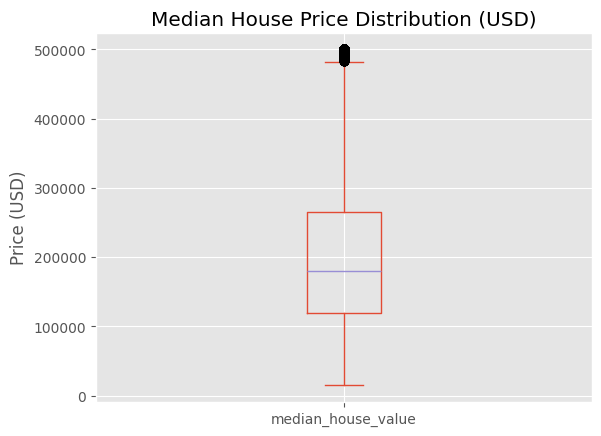

In [67]:
ax = df['median_house_value'].plot(kind='box', title='Median House Price Distribution (USD)')
ax.set_ylabel("Price (USD)")

# Step 4: Feature Relationships